# Notebook 1: SIR Model Simulation
### Peter Nolan 
### databeaker@gmail.com
### https://github.com/dpnolan/pandemic

## Introduction ##

SIR epidemic example data generation 

- S(t) is the number of people susceptible to becoming infected (no immunity)
- I(t) is the number of people currently infected (and infectious)
- R(t) is the number of recovered people(SIR assumes that they remain immune)
- alpha $\alpha$ is the constant rate of infectious contact between people often called transmission rate
- gamma $\gamma$ is the rate of recovery of infected individuals, 1 over the days to recovery
- $R_0$ derived from them

## Setup

uses kernel __pymc_env_1__ on PC

In [ ]:
#!conda list --export > requirements.txt

In [76]:
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import matplotlib.pyplot as plt

## Inputs

In [77]:
def simulation(N=4900000, beta=0.5, gamma=1./3, I0=10, R0=0, days=160):
    
    t = np.linspace(0, days, days)
    R_0= (beta*N/gamma)/N
    S0 = N - I0 - R0

    # Initial conditions vector
    y0 = S0, I0, R0
    
    # Integrate the SIR equations over the time grid, t.
    ret = odeint(deriv, y0, t, args=(N, beta, gamma))
    S, I, R = ret.T

    # Create a DataFrame
    sir_df = pd.DataFrame({
        "S": S,
        "I": I,
        "R": R
    })
    sir_df = sir_df.astype(int)
    
    return sir_df

In [78]:
# The SIR model differential equations.
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [79]:
simulation_df=simulation()
simulation_df

,S,I,R
0,4899990,10,0
1,4899984,11,3
2,4899978,13,7
3,4899970,16,13
4,4899961,19,19
...,...,...,...
155,2044256,26,2855716
156,2044251,23,2855724
157,2044246,20,2855732
158,2044242,18,2855738


In [80]:
# Plot the data on three separate curves for S(t), I(t) and R(t)
def plot_simulation(simulation_df): 
    S=simulation_df.S
    I=simulation_df.I
    R=simulation_df.R

    days=len(simulation_df['S'])
    t = np.linspace(0, days, days)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, axisbelow=True)
    ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Susceptible')
    ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recovered')
    ax.set_xlabel('Time')
    ax.set_ylabel('People')
    ax.set_ylim(0,max(S)*1.2)
    ax.yaxis.set_tick_params(length=5)
    ax.xaxis.set_tick_params(length=5)
    _ = ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    

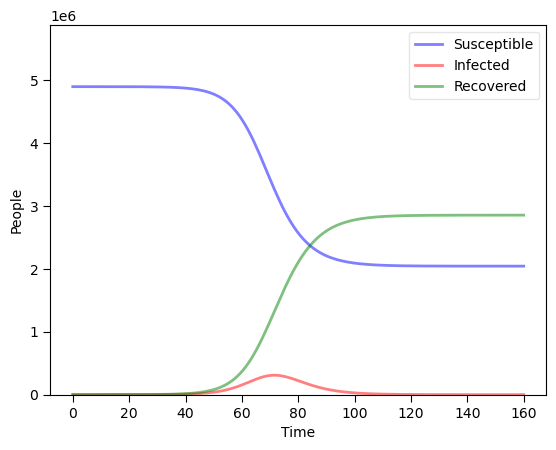

In [81]:
plot_simulation(simulation_df)
plt.savefig('sir1.png')

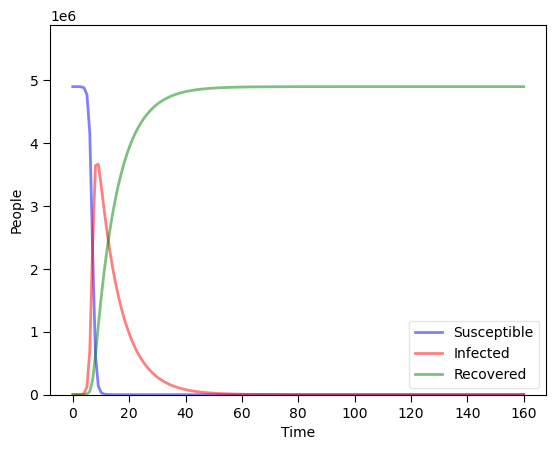

In [21]:
# 2nd simulation
simulation2_df=simulation(N=4900000, beta=2, gamma=1./8, I0=10, R0=0, days=160)
plot_simulation(simulation2_df)
plt.savefig("sir2.png")

In [38]:
beta=0.5
gamma=1./3
N=4.9e6
S0=N
I0=10
R0=0

In [39]:
R_0= (beta*N/gamma)/N

In [40]:
R_0

1.5

In [41]:
1-1/R_0

0.33333333333333337

In [42]:
# Initial conditions vector
y0 = S0, I0, R0

In [43]:
# Plot the data for I(t)

def plot_simulation_infected(simulation_df): 
    
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, axisbelow=True)
    #ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
    
    days=len(simulation_df['S'])
    t=np.linspace(0,days,days)
    
    ax.plot(t, simulation_df['I'], 'r', alpha=0.5, lw=2, label='Infected')
    ax.set_xlabel('Time /days')
    ax.set_ylabel('People')
    ax.set_ylim(0,max(simulation_df['I'])*1.2)
    ax.yaxis.set_tick_params(length=5)
    ax.xaxis.set_tick_params(length=5)
    _ = ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
    
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)

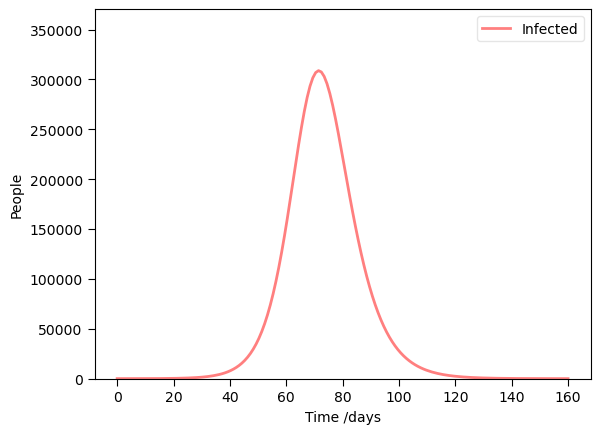

In [44]:
plot_simulation_infected(simulation_df)
plt.savefig('sir3.png')

In [ ]:
#sir_df.to_csv("sir.csv", index=False)

## Generate Statistics 

In [45]:
# Generate the full range 
for i in range(0, len(simulation_df['S'])):
    
    print("{:,.0f}: S={:,.0f}, I={:,.0f}, R={:,.0f}".format(i,simulation_df['S'].iloc[i],simulation_df['I'].iloc[i],simulation_df['R'].iloc[i]))

0: S=4,899,990, I=10, R=0
1: S=4,899,984, I=11, R=3
2: S=4,899,978, I=13, R=7
3: S=4,899,970, I=16, R=13
4: S=4,899,961, I=19, R=19
5: S=4,899,950, I=23, R=26
6: S=4,899,937, I=27, R=34
7: S=4,899,922, I=32, R=44
8: S=4,899,905, I=38, R=56
9: S=4,899,884, I=45, R=70
10: S=4,899,859, I=53, R=87
11: S=4,899,830, I=63, R=106
12: S=4,899,795, I=74, R=129
13: S=4,899,754, I=88, R=156
14: S=4,899,706, I=104, R=189
15: S=4,899,648, I=123, R=227
16: S=4,899,580, I=146, R=272
17: S=4,899,500, I=173, R=326
18: S=4,899,406, I=204, R=389
19: S=4,899,294, I=241, R=464
20: S=4,899,161, I=286, R=552
21: S=4,899,004, I=338, R=656
22: S=4,898,819, I=400, R=780
23: S=4,898,600, I=473, R=926
24: S=4,898,341, I=559, R=1,099
25: S=4,898,035, I=661, R=1,303
26: S=4,897,673, I=781, R=1,545
27: S=4,897,244, I=924, R=1,830
28: S=4,896,738, I=1,092, R=2,168
29: S=4,896,140, I=1,292, R=2,567
30: S=4,895,433, I=1,527, R=3,038
31: S=4,894,598, I=1,805, R=3,596
32: S=4,893,610, I=2,133, R=4,255
33: S=4,892,443, I=2

In [46]:
N=(simulation_df['S'].iloc[-1]+simulation_df['I'].iloc[-1]+simulation_df['R'].iloc[-1])

In [47]:
print ("Final number Recovered = {:,.0f}".format(simulation_df['R'].iloc[-1]))
print ("Final percentage Infected = {:.2%}".format((simulation_df['I'].iloc[-1]+simulation_df['R'].iloc[-1])/N))

Final number Recovered = 2,855,744
Final percentage Infected = 58.28%


In [48]:
print("Infectious is at the maximum on day {:.0f}".format(simulation_df['I'].argmax()))

Infectious is at the maximum on day 71


In [49]:
print("Maximum number Infected = {:,.0f}".format(max(simulation_df['I'])))
print("Maximum percentage Infected = {:,.2%}".format(max(simulation_df['I'])/N))

Maximum number Infected = 308,808
Maximum percentage Infected = 6.30%


In [50]:
alpha=0.5
beta=1/3

In [51]:
R_0=alpha/(beta)
R_0

1.5

In [52]:
print("Herd Immunity Threshold (HIT) = {:.3%}".format(1-1/R_0))

Herd Immunity Threshold (HIT) = 33.333%


In [53]:
print("Infectious once herd immunity is reached is = {0:,.2%}".format((1-1/R_0)))
print("Infectious once herd immunity is reached is = {0:,.0f}".format((1-1/R_0)*N))

Infectious once herd immunity is reached is = 33.33%
Infectious once herd immunity is reached is = 1,633,333


In [54]:
np.log(.8)

-0.2231435513142097

In [55]:
R_n = (R_0 * simulation_df['S'] / N)

In [56]:
R_n

0      1.499998
1      1.499996
2      1.499994
3      1.499991
4      1.499989
         ...   
155    0.625793
156    0.625791
157    0.625790
158    0.625789
159    0.625787
Name: S, Length: 160, dtype: float64

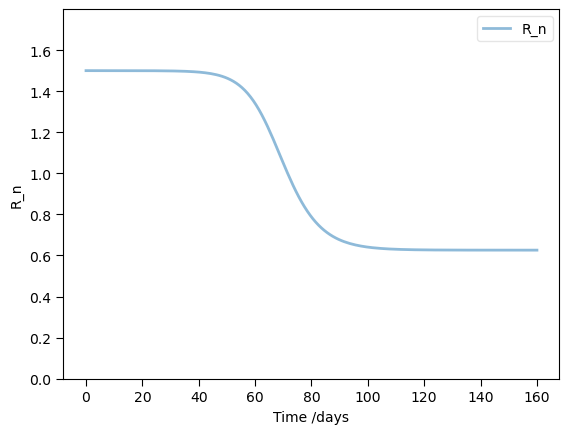

In [59]:
# Plot the data for R_n

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)

#ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

days=len(simulation_df['S'])
t=np.linspace(0,days,days)

ax.plot(t, R_n, alpha=0.5, lw=2, label='R_n')
ax.set_xlabel('Time /days')
ax.set_ylabel('R_n')
ax.set_ylim(0,max(R_n)*1.2)
ax.yaxis.set_tick_params(length=5)
ax.xaxis.set_tick_params(length=5)
_ = ax.grid(visible=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
plt.savefig('sir4.png')

In [64]:
R_n[R_n>1]

0     1.499998
1     1.499996
2     1.499994
3     1.499991
4     1.499989
        ...   
67    1.133978
68    1.100959
69    1.067816
70    1.034943
71    1.002712
Name: S, Length: 72, dtype: float64

In [65]:
(R_n>1).sum()

72

In [66]:
print("{:,.0f}".format(simulation_df['S'][73]))

3,075,423


In [67]:
print("{:,.0f}".format(simulation_df['S'][74]))

2,982,265


In [68]:
print("{:,.3%}".format(simulation_df['S'][73]/N))

62.764%


In [69]:
print("{:,.3%}".format(simulation_df['S'][74]/N))

60.863%


In [70]:
R_n[73]

0.9414564046760835

In [71]:
R_n[74]

0.912938637934138

# Section 4: COVID in Ireland

## IRELAND estimate for max COVID infections without controls 

In [72]:
IRELAND_R0=2.9

IRELAND_IFR=1/200

IRELAND_N=4900000

In [73]:
print("% Infected under herd immunity = {0:,.2%}".format((1-1/IRELAND_R0)))

print("Infected under herd immunity = {0:,.0f}".format((1-1/IRELAND_R0)*IRELAND_N))

print("Deaths with no interventions = {0:,.0f}".format((1-1/IRELAND_R0)*IRELAND_IFR*IRELAND_N))

% Infected under herd immunity = 65.52%
Infected under herd immunity = 3,210,345
Deaths with no interventions = 16,052


## UK estimate for max COVID infections without controls 

COVID R_0 = __2.9__ and Infection Fatality Rate estimates early in the pandemic of __1.15%__ both come from Spiegelhalter and Masters (2021)

In [74]:
UK_R0=2.4
UK_IFR=1.15/100
UK_N=67.33e6

In [75]:
print("% Infectious under herd immunity = {0:,.2%}".format((1-1/UK_R0)))
print("Infectious under herd immunity = {0:,.0f}".format((1-1/UK_R0)*UK_N))
print("Deaths with no interventions = {0:,.0f}".format((1-1/UK_R0)* UK_IFR * UK_N))

% Infectious under herd immunity = 58.33%
Infectious under herd immunity = 39,275,833
Deaths with no interventions = 451,672
